# For Kaggle

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# # Load the data set : train & test set already prepared
# train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# For Jupyter Lab

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
importTrain = 'train.csv'
importTest = 'test.csv'
train = pd.read_csv(importTrain, sep=',')
test = pd.read_csv(importTest, sep=',')
# le sep est tab

Method to check if programming is PEP8 friendly

https://github.com/nbpep8/nbpep8

In [5]:
import pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

Looking in indexes: https://test.pypi.org/simple/


In [6]:
from nbpep8.nbpep8 import pep8

In [7]:
# Test example
import os,sys
a =  23

pep8(_ih)

cell_content.py:2:10: E231 missing whitespace after ','
cell_content.py:2:10: E401 multiple imports on one line
cell_content.py:3:4: E222 multiple spaces after operator



In [8]:
# Train and test shapes
print("train shape : ", train.shape, "\ntest shape : ", test.shape)

train shape :  (1460, 81) 
test shape :  (1459, 80)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

In [12]:
pd.set_option('display.max_columns', None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Check difference between train and test pre made dataframes
# Target = SalePrice
temp1 = list(df_train.columns.values)
temp2 = list(df_test.columns.values)
print("Difference:", list(set(temp1)-set(temp2)))

Difference: ['SalePrice']


# Cleaning

In [229]:
def Affichage_Data_Seuil(data, path, thresh, color='black', edgecolor='black',
                         size_x=15, size_y=5, sizeLabelx=5,
                         sizeTitle=15, sizeTxt=12):

    plt.figure(figsize=(size_x, size_y))
    plt.ylim(0, 100)
    plt.gcf().subplots_adjust(bottom=0.5)

    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending=False).plot.bar(color=color,
                                                     edgecolor=edgecolor)

    plt.axhline(y=thresh, color='r', linestyle='-')

    plt.title('Missing values per column %',
              fontsize=sizeTitle,
              weight='bold')

    plt.text(len(data.isnull().sum() / len(data)) / 1.7,
             thresh+10,
             'Columns with more than %s%s missing values' % (thresh, '%'),
             fontsize=sizeTxt,
             weight='bold',
             color='red',
             ha='left',
             va='top')

    plt.text(len(data.isnull().sum() / len(data)) / 1.7,
             thresh-3,
             'Columns with less than %s%s missing values' % (thresh, '%'),
             fontsize=sizeTxt,
             weight='bold',
             color='green',
             ha='left',
             va='top')

    plt.xlabel('Columns', size=sizeLabelx, weight='bold')
    plt.ylabel('% missing values', weight='bold')
    plt.yticks(weight='bold')

    # Save plot
    plt.savefig(path)

    return plt.show()


pep8(_ih)

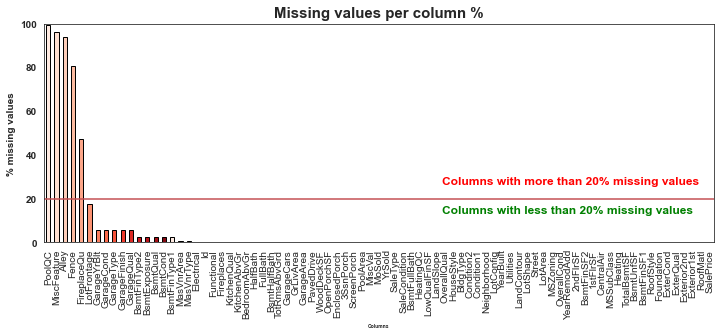

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

path = 'Figures/P8_Clean_01.jpg'

# Plot missing data inside df_train
val = 20
Affichage_Data_Seuil(df_train,
                     path,
                     val,
                     color=sns.color_palette('Reds', 15),
                     size_x=12,
                     size_y=8)


pep8(_ih)

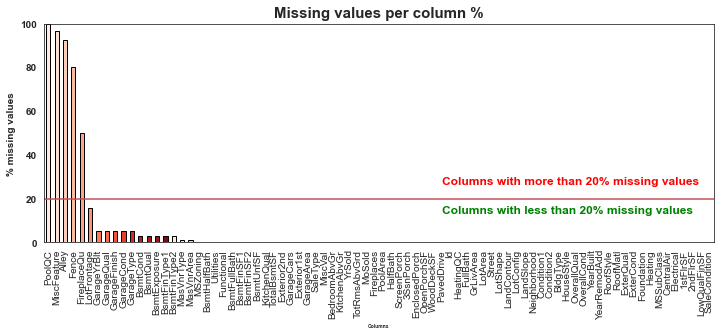

In [231]:
path = 'Figures/P8_Clean_02.jpg'

# Plot missing data inside df_test
val = 20
Affichage_Data_Seuil(df_test,
                     path,
                     val,
                     color=sns.color_palette('Reds', 15),
                     size_x=12,
                     size_y=8)


pep8(_ih)

In [17]:
# Concatenate Train and test at first
df_train_no_target = df_train.copy()
# Drop the target column
df_train_no_target = df_train.drop(['SalePrice'], axis=1)
# Concatenate
df_all = pd.concat([df_train_no_target, df_test], ignore_index=True)


pep8(_ih)

In [18]:
# Quite observation to detect some possible outliers : example ; negative value for LotArea
df_all.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [37]:
# Delete columns with "seuil" or more missing data
seuil = len(df_all)*(100-val)/100

df_all_00 = df_all.copy()
df_all_00 = df_all_00.dropna(thresh=seuil, axis=1)

print(f"Data shape before cleaning {df_all.shape}")
print(f"Data shape after cleaning {df_all_00.shape}")
print(f"We dropped {df_all.shape[1] - df_all_00.shape[1]} columns")


pep8(_ih)

Data shape before cleaning (2919, 80)
Data shape after cleaning (2919, 75)
We dropped 5 columns



In [38]:
# Select only columns containing numerical values (quick choice)
Col_Float = list(df_all_00.select_dtypes(include=['float64', 'int64']).columns)
Col_Float

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
# Quite observation to detect some possible outliers : example ; negative value for LotArea
df_all.describe()

In [ ]:
# Delete columns with "seuil" or more missing data
seuil = len(df_all)*(100-val)/100

df_all_01= df_all.copy()
df_all_01 = df_all_01.dropna(thresh=seuil, axis=1)

print(f"Data shape before cleaning {df_all.shape}")
print(f"Data shape after cleaning {df_all_01.shape}")
print(f"We dropped {df_all.shape[1]- df_all_01.shape[1]} columns")

In [ ]:
# Select only columns containing numerical values (quick choice)
Col_Float = list(df_all_01.select_dtypes(include=['float64', 'int64']).columns)
Col_Float

In [42]:
df_all_02.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [39]:
# New dataframe with numerical values
df_all_01 = df_all_00.copy()
df_all_01 = df_all_01[Col_Float]
df_all_01.shape

(2919, 37)

In [40]:
# Delete some columns considered as useless (example : ID)
df_all_02 = df_all_01.copy()
df_all_02 = df_all_02.drop(['Id'], axis=1)
df_all_02.shape

(2919, 36)

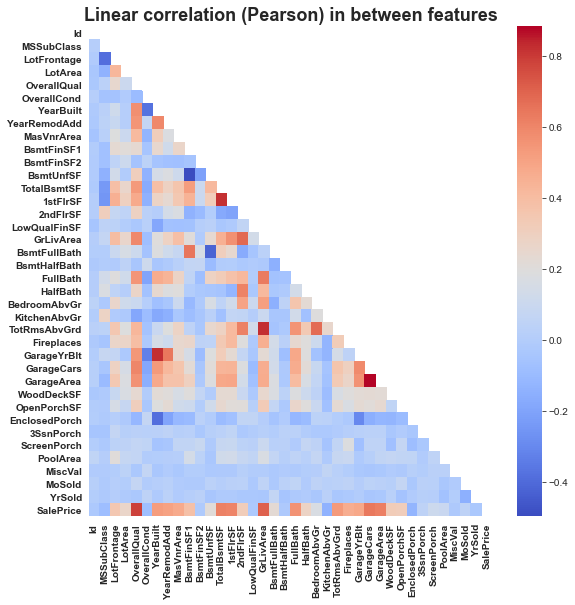

(None,
          level_0       level_1  corr_coeff
 74    GarageArea    GarageCars    0.882475
 72     YearBuilt   GarageYrBlt    0.825667
 70  TotRmsAbvGrd     GrLivArea    0.825489
 68   TotalBsmtSF      1stFlrSF    0.819530
 66   OverallQual     SalePrice    0.790982
 64     SalePrice     GrLivArea    0.708624
 62      2ndFlrSF     GrLivArea    0.687501
 60  TotRmsAbvGrd  BedroomAbvGr    0.676620
 58  BsmtFullBath    BsmtFinSF1    0.649212
 56  YearRemodAdd   GarageYrBlt    0.642277
 54    GarageCars     SalePrice    0.640409
 52     GrLivArea      FullBath    0.630012
 50     SalePrice    GarageArea    0.623431
 48      2ndFlrSF  TotRmsAbvGrd    0.616423
 46     SalePrice   TotalBsmtSF    0.613581
 44      HalfBath      2ndFlrSF    0.609707
 42     SalePrice      1stFlrSF    0.605852
 40   OverallQual    GarageCars    0.600671
 38   OverallQual     GrLivArea    0.593007
 36     YearBuilt  YearRemodAdd    0.592855
 34   GarageYrBlt    GarageCars    0.588920
 32   OverallQual     Yea

In [250]:
# Param
path = 'Figures/P8_Pearsons_Corr_train.jpg'

# Plot and save Pearson corr
Matrice_Pearson_Data(df_train, path, 0.5)

In [41]:
# Check if some col can be removed due to low var threshold
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.01))
sel.fit(df_all_02)

print('-----------------------------------------------------\n')
print("Feature selection:\n", sel.get_support())
print("\n\nSelected features:\n", list(df_all_02.columns[sel.get_support()]))
print("\n\nRemoved features:\n", list(df_all_02.columns[~sel.get_support()]))
print('-----------------------------------------------------\n')


pep8(_ih)

-----------------------------------------------------

Feature selection:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


Selected features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Removed features:
 []
-----------------------------------------------------




# Explore outliers and correlation

In [249]:
def Matrice_Pearson_Data(Data, path, seuil, size_x=10, size_y=10):

    titre = "Linear correlation (Pearson) in between features"

    df_corr = Data.corr(method='pearson')

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size_x, size_y))

    # Draw the heatmap with the mask and correct aspect ratio
    # sns.heatmap(df_corr, annot=True, mask=mask, annot_kws={'size':8}, center=0, cmap='coolwarm')

    # Color levels only
    sns.heatmap(df_corr, mask=mask, cmap='coolwarm')

    # Choice to get full matrix
    # sns.heatmap(df_corr, cmap='coolwarm')

    # Adjust size of xlabels
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.gcf().subplots_adjust(left=0.2)

    plt.title(titre,
              weight='bold',
              fontsize=18)

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')

    # Select pairs with chosen threshold
    threshold = seuil

    # Plot correlated pairs
    corr_pairs = df_corr.unstack().sort_values(kind="quicksort")
    strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
                   .reset_index().rename(columns={0: 'corr_coeff'}))

    strong_corr = strong_corr[(strong_corr.index % 2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
    # strong_corr.sort_values('corr_coeff', ascending=False)

    # Save plot
    plt.savefig(path)

    return plt.show(), strong_corr.sort_values('corr_coeff', ascending=False)


pep8(_ih)

cell_content.py:14:80: E501 line too long (98 > 79 characters)
cell_content.py:41:80: E501 line too long (112 > 79 characters)



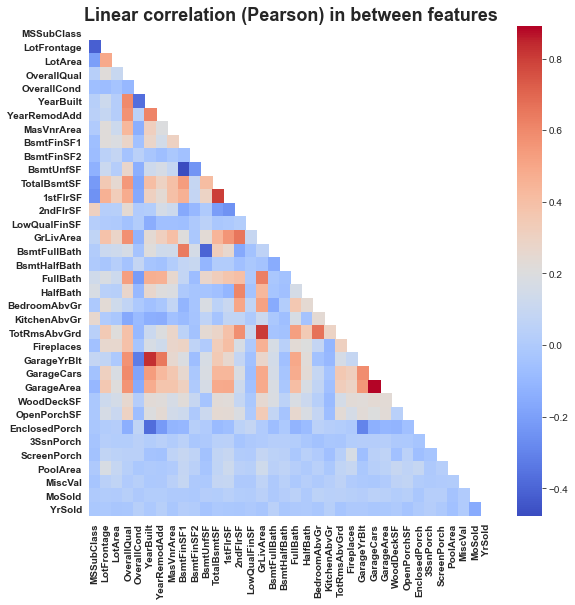

(None,
          level_0       level_1  corr_coeff
 54    GarageCars    GarageArea    0.889700
 52     YearBuilt   GarageYrBlt    0.834812
 50     GrLivArea  TotRmsAbvGrd    0.808354
 48      1stFlrSF   TotalBsmtSF    0.801670
 46  TotRmsAbvGrd  BedroomAbvGr    0.669737
 44     GrLivArea      2ndFlrSF    0.655085
 42  YearRemodAdd   GarageYrBlt    0.652365
 40    BsmtFinSF1  BsmtFullBath    0.638847
 38     GrLivArea      FullBath    0.630286
 36     YearBuilt  YearRemodAdd    0.612235
 34      2ndFlrSF      HalfBath    0.611362
 32   OverallQual    GarageCars    0.600744
 30     YearBuilt   OverallQual    0.597554
 28    GarageCars   GarageYrBlt    0.587712
 26      2ndFlrSF  TotRmsAbvGrd    0.584586
 24     GrLivArea   OverallQual    0.575126
 22   OverallQual   GarageYrBlt    0.571803
 20   OverallQual  YearRemodAdd    0.571532
 18    GarageArea   OverallQual    0.565122
 16     GrLivArea      1stFlrSF    0.562538
 14   GarageYrBlt    GarageArea    0.555836
 12   TotalBsmtSF   Overa

In [251]:
# Param
path = 'Figures/P8_Pearsons_Corr.jpg'

# Plot and save Pearson corr
Matrice_Pearson_Data(df_all_02, path, 0.5)

In [81]:
# We could go further with the variance inflation factor to delete correlated features
# Choice to delete some redundant features (from Pearson correlation with threshold)
# The purpose here is to avoid high multicolinearity (ie features explaining the same thing)

# Delete features considered as useless at the same time

Col_Correlated = ['GarageCars',
                  'GarageYrBlt',
                  'TotRmsAbvGrd']

df_all_03 = df_all_02.copy()
df_all_03 = df_all_03.drop(Col_Correlated, axis=1)
print(df_all_03.shape)

pep8(_ih)

(2919, 33)
cell_content.py:1:80: E501 line too long (86 > 79 characters)
cell_content.py:2:80: E501 line too long (84 > 79 characters)
cell_content.py:3:80: E501 line too long (92 > 79 characters)



# Explore features

In [86]:
df_temp.shape

(2919, 32)

In [83]:
def Moustache_Data_Col(dataDF, width=20, height=8,
                       titre='Boxplot', xval='', yval=''):

    # Fig size
    plt.figure(figsize=(width, height))

    # Adjust size of ylabels
    plt.gcf().subplots_adjust(left=0.2)

    # Multiple plot
    ax = sns.boxplot(data=dataDF, orient="h", palette="Set2")

    # Title
    plt.title(titre,
              weight='bold',
              fontsize=12)

    # Labels x & y
    plt.xlabel(xval, weight='bold', fontsize=14)
    plt.ylabel(yval, weight='bold', fontsize=10)

    return plt.show()


pep8(_ih)

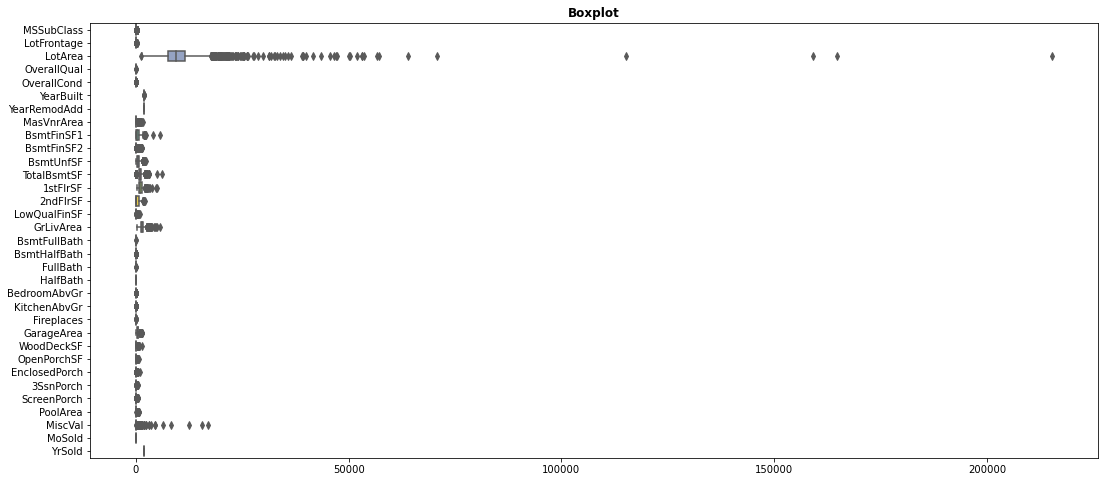

In [84]:
Moustache_Data_Col(df_all_03)

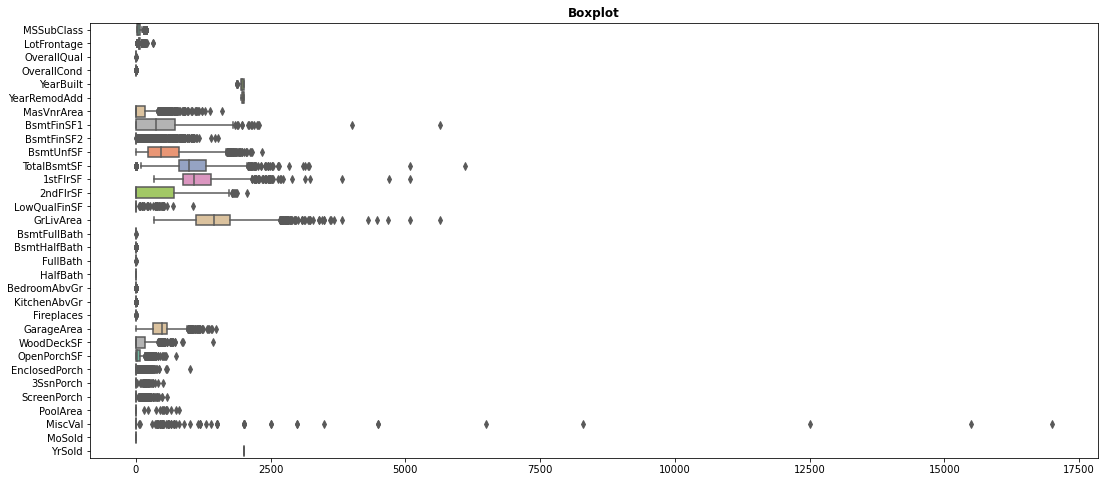

In [85]:
# Clear the view (scales are different)
df_temp = df_all_03.drop(['LotArea'], axis=1)
Moustache_Data_Col(df_temp)

In [87]:
Col_Num = list(df_all_03.columns)
len(Col_Num)

33

In [212]:
import math


def Plot_Hist_From_List(Data, Liste, PlotLine=5, L=30,
                        H=70, C='green', D=False):

    number = len(Liste)

    i, j = 0, 0

    COL_PLOT = PlotLine
    ROW_PLOT = math.ceil(number/COL_PLOT)

    fig, axes = plt.subplots(nrows=ROW_PLOT, ncols=COL_PLOT,
                             figsize=(L, H), squeeze=False)

    for name in Liste:

        # title = name_y + ' en fonction de ' + name_x

        # axes[i][j].hist(x = Data[name], density=D, color = C)
        sns.histplot(data=Data, x=name, stat="count", ax=axes[i][j])
        axes[i][j].set_ylabel(' ')
        axes[i][j].set_xlabel(name)
        # axs[i][j].set_title(title)

        # Change line/col
        j += 1
        if j % COL_PLOT == 0:
            i += 1
            j = 0

    return plt.show()


pep8(_ih)

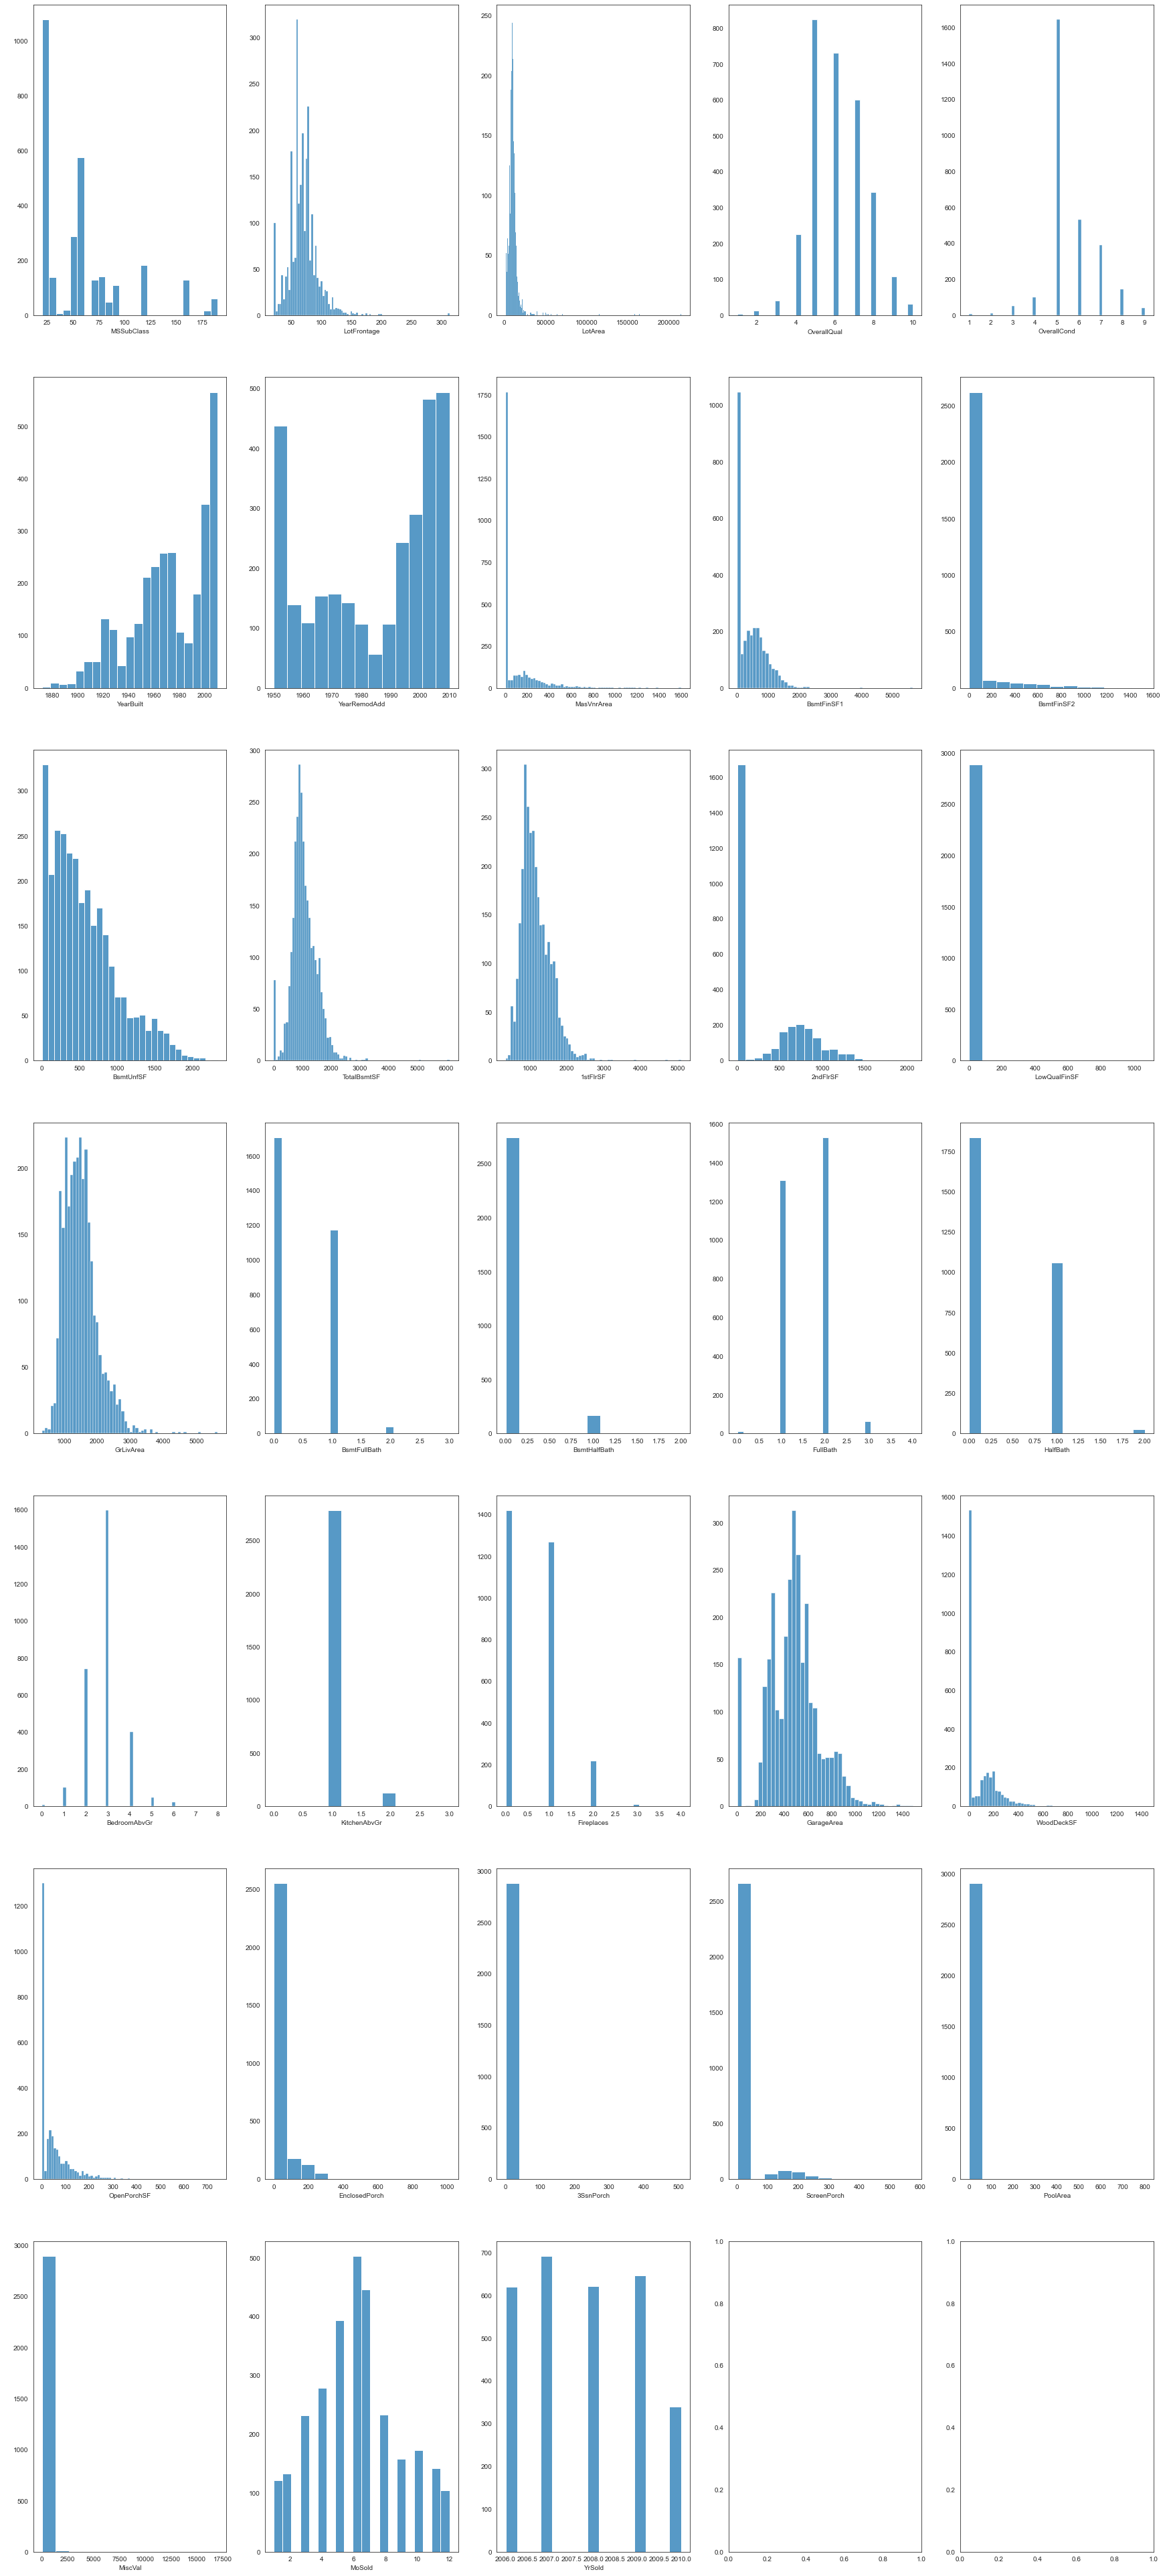

In [213]:
Plot_Hist_From_List(df_all_03, Col_Num)

In [90]:
def Plot_Boxplot_From_List(Data, Liste, PlotLine=5,
                           L=30, H=70, C='green', D=False):

    # Paramètres pour regler les lignes
    number = len(Liste)

    i, j = 0, 0

    COL_PLOT = PlotLine
    ROW_PLOT = math.ceil(number/COL_PLOT)

    fig, axes = plt.subplots(nrows=ROW_PLOT, ncols=COL_PLOT,
                             figsize=(L, H), squeeze=False)

    for name in Liste:

        # titre = name_y + ' en fonction de ' + name_x  # Illisible / trop lourd

        # axes[i][j].hist(x = Data[name], density=D, color = C)
        sns.boxplot(data=Data, x=name, ax=axes[i][j])
        axes[i][j].set_ylabel(' ')
        axes[i][j].set_xlabel(name)
        # axs[i][j].set_title(titre)

        # Changement de ligne/col
        j += 1
        if j % COL_PLOT == 0:
            i += 1
            j = 0

    return plt.show()


pep8(_ih)

cell_content.py:17:80: E501 line too long (80 > 79 characters)



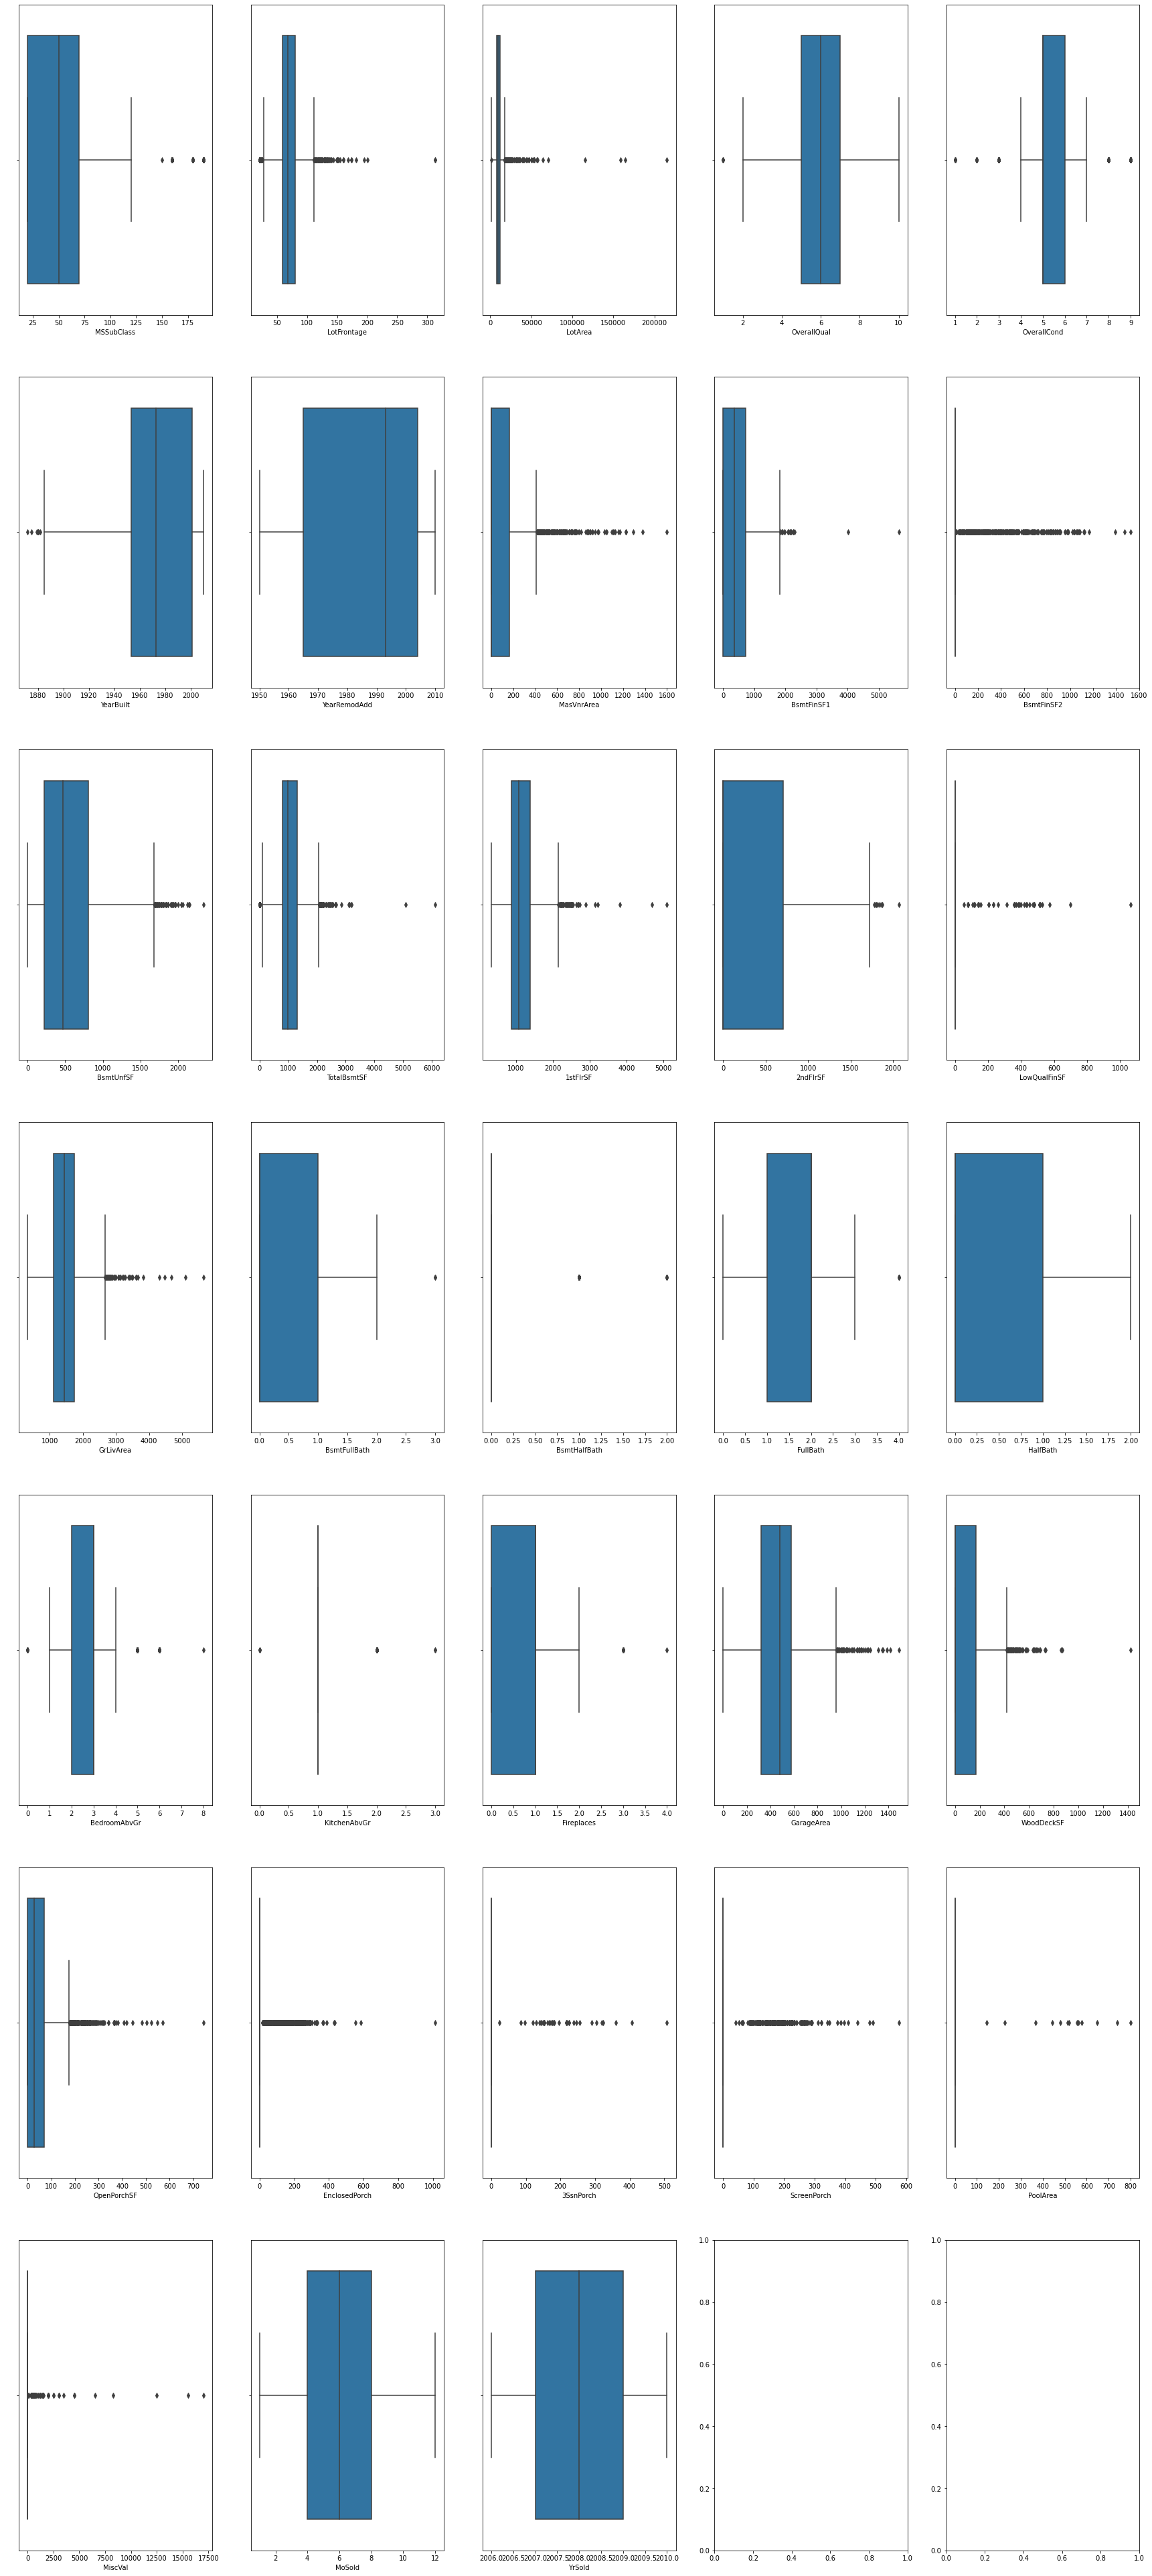

In [91]:
Plot_Boxplot_From_List(df_all_03, Col_Num)

Outliers can be removed agressively on some boxplots (1.5*IQR method)

On others, we might need to be more gentle to avoid losing to much data (remove top 1%)

In [93]:
List_NaN_Top1 = ['EnclosedPorch',
                 '3SsnPorch',
                 'ScreenPorch',
                 # 'PoolArea',
                 'MiscVal',
                 'LowQualFinSF']

List_NaN_IQR = ['MSSubClass', 'LotFrontage', 'LotArea',
                'OverallQual', 'OverallCond',
                'YearBuilt',
                'YearRemodAdd',
                'MasVnrArea', 'BsmtFinSF1',
                # 'BsmtFinSF2',
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                '2ndFlrSF', 'GrLivArea',
                'BsmtFullBath', 'FullBath', 'HalfBath',
                'BedroomAbvGr', 'Fireplaces',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'MoSold', 'YrSold']


pep8(_ih)

In [94]:
def NaN_Outliers_IQR(data, col_names):

    for col in col_names:

        # Quantiles
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        # IQR
        IQR = Q3 - Q1

        # Limits
        LowerLim = Q1 - 1.5*IQR
        UpperLim = Q3 + 1.5*IQR

        # Outliers to NaN
        data.loc[data[col] <= LowerLim, [col]] = np.nan
        data.loc[data[col] >= UpperLim, [col]] = np.nan

    return data


pep8(_ih)

In [95]:
def NaN_Top_percent(data, col_names):

    for col in col_names:

        borne = np.percentile(data[col], 99)

        # Top 1% to NaN
        data.loc[data[col] >= borne, [col]] = np.nan

    return data


pep8(_ih)

# Un-concatenante train and test

In [99]:
print('Train shape', df_train.shape, 'Test Shape', df_test.shape)

Train shape (1460, 81) Test Shape (1459, 80)


In [100]:
df_train_02 = df_all_03[:1460]
df_test_02 = df_all_03[1460:]
print('Train shape', df_train_02.shape, 'Test Shape', df_test_02.shape)


pep8(_ih)

Train shape (1460, 33) Test Shape (1459, 33)



# Clean outliers ?

Train and test have been split to retake initial form

Following steps :
- clean outliers inside df_train_02
- keep them on purpose inside test set which is df_test_02

In [101]:
df_train_03 = df_train_02.copy()

# Clean features that seem fit with 1.5*IQR
df_train_03 = NaN_Outliers_IQR(df_train_03, List_NaN_IQR)

# Clean features that seem fit removing top1% values
df_train_03 = NaN_Top_percent(df_train_03, List_NaN_Top1)


pep8(_ih)

In [102]:
def seuil_nan_data(data, axisVal, seuil):

    if(axisVal == 0):
        name = 'columns'
        str1 = 'of'

    if(axisVal == 1):
        name = 'observations'
        str1 = 'of'

    tab_nan = (data.isnull().sum(axis=axisVal)/data.shape[axisVal])
    count_nan = 0

    for i in range(len(tab_nan)):
        if(tab_nan[i] >= (seuil/100)):
            count_nan += 1

    print('Number', str1, name, 'with more than',
          seuil, '% NaN:', count_nan, name)


pep8(_ih)

In [103]:
seuil_nan_data(df_train_02, 0, 5)

Number of columns with more than 5 % NaN: 1 columns


In [104]:
# Check cleaning 
# Go back if a feature is to severely impacted
# We still want to keep as much data as possible
seuil_nan_data(df_train_03, 0, 25)

Number of columns with more than 25 % NaN: 0 columns


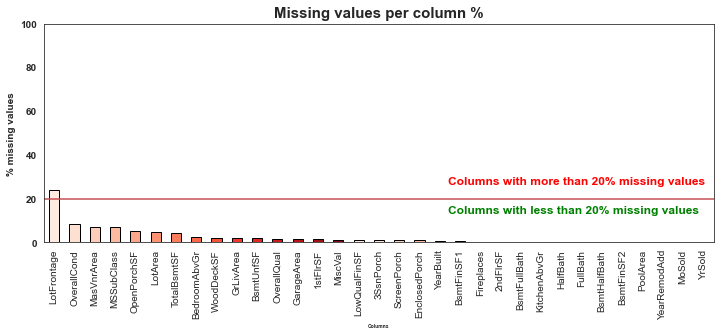

cell_content.py:8:52: E231 missing whitespace after ','



In [232]:
path = 'Figures/P8_Clean_03.jpg'

# Plot missing data inside df_train
val = 20
Affichage_Data_Seuil(df_train_03,
                     path,
                     val,
                     color=sns.color_palette('Reds', 15),
                     size_x=12,
                     size_y=8)

pep8(_ih)

# Data Inputing

We'd like to keep as much variability as possible, avoid deleting observations and avoid mean or median imputing

For these reasons, KNN imputer might be an interesting choice :
- knn preserve the original data structure
- sets plausible values
- avoids distorsion of the imputed variable's distribution (1)

(1) Beretta, L., Santaniello, A. Nearest neighbor imputation algorithms: a critical evaluation. BMC Med Inform Decis Mak 16, 74 (2016). https://doi.org/10.1186/s12911-016-0318-z

In [106]:
from sklearn.impute import KNNImputer

# Imputer knn
imputer = KNNImputer(n_neighbors=10) # Default n_neighbors set to 5

In [107]:
df_train_04 = df_train_03.copy()
df_train_04 = pd.DataFrame(imputer.fit_transform(df_train_04),
                           columns=df_train_04.columns)

# Checking
df_train_04.isna().sum()


pep8(_ih)

In [108]:
# KNN imputing done to test set
df_test_03 = df_test_02.copy()
df_test_03 = pd.DataFrame(imputer.fit_transform(df_test_03),
                          columns=df_test_03.columns)

# Checking
df_test_03.isna().sum()


pep8(_ih)

# Explore Target

At first, we have to add the target column to df_train_04 and check missing values

In [109]:
df_train_05 = df_train_04.copy()
df_train_05['SalePrice'] = df_train['SalePrice']
# Beware : no observation has been delete before
df_train_05.shape


pep8(_ih)

In [110]:
# Check missing data inside target
df_train_05['SalePrice'].isnull().sum()

0

In [111]:
df_train_05.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500
1,20.0,80.0,9600.0,6.0,5.9,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,642.0,0.0,35.0,49.3,0.0,0.0,0.0,0.0,2.0,2006.0,140000
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000


C:\Users\evari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


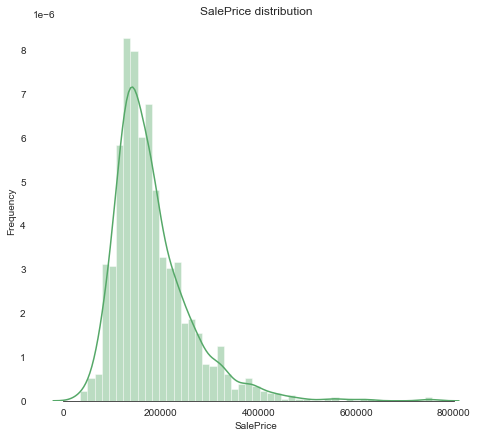

In [236]:
# Target distribution

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

# Check the distribution

sns.distplot(df_train_05['SalePrice'], color="g")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

# Save distribution plot
plt.savefig('Figures/P8_Distribution_y.jpg')

plt.show()


pep8(_ih)

In [221]:
# Skewness of target
print("Skewness: %f" % df_train_05['SalePrice'].skew())

# Mode value
print('Mode: ', df_train_05['SalePrice'].mode())

Skewness: 1.882876
Mode:  0    140000
dtype: int64


In [214]:
df_train_05['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Target is right skewed.

We can consider applying log function to the target to ease the learning process.

The result of applying log function will be to get nearer to normal distribution.

In [245]:
def Plot_Scatter_2_Features_ALL(Data, path, cols_x, cols_y, PltLine=5, L=30, H=70):

    # Parameters
    a = len(cols_x)
    b = len(cols_y)
    number = a*b

    i, j = 0, 0
    PLOTS_PER_ROW = PltLine
    fig, axs = plt.subplots(math.ceil(number/PLOTS_PER_ROW),
                            PLOTS_PER_ROW,
                            figsize=(L, H))

    for name_y in cols_y:
        for name_x in cols_x:

            # titre = name_y + ' en fonction de ' + name_x
            # Unreadable

            axs[i][j].scatter(x=Data[name_x],
                              y=Data[name_y],
                              color='black',
                              alpha=0.3)
            axs[i][j].set_ylabel(name_y)
            axs[i][j].set_xlabel(name_x)
            # axs[i][j].set_title(titre)

            # Change of row/col
            j += 1
            if j % PLOTS_PER_ROW == 0:
                i += 1
                j = 0

    # Save distribution plot
    plt.savefig(path)

    return plt.show()


pep8(_ih)

cell_content.py:1:80: E501 line too long (83 > 79 characters)



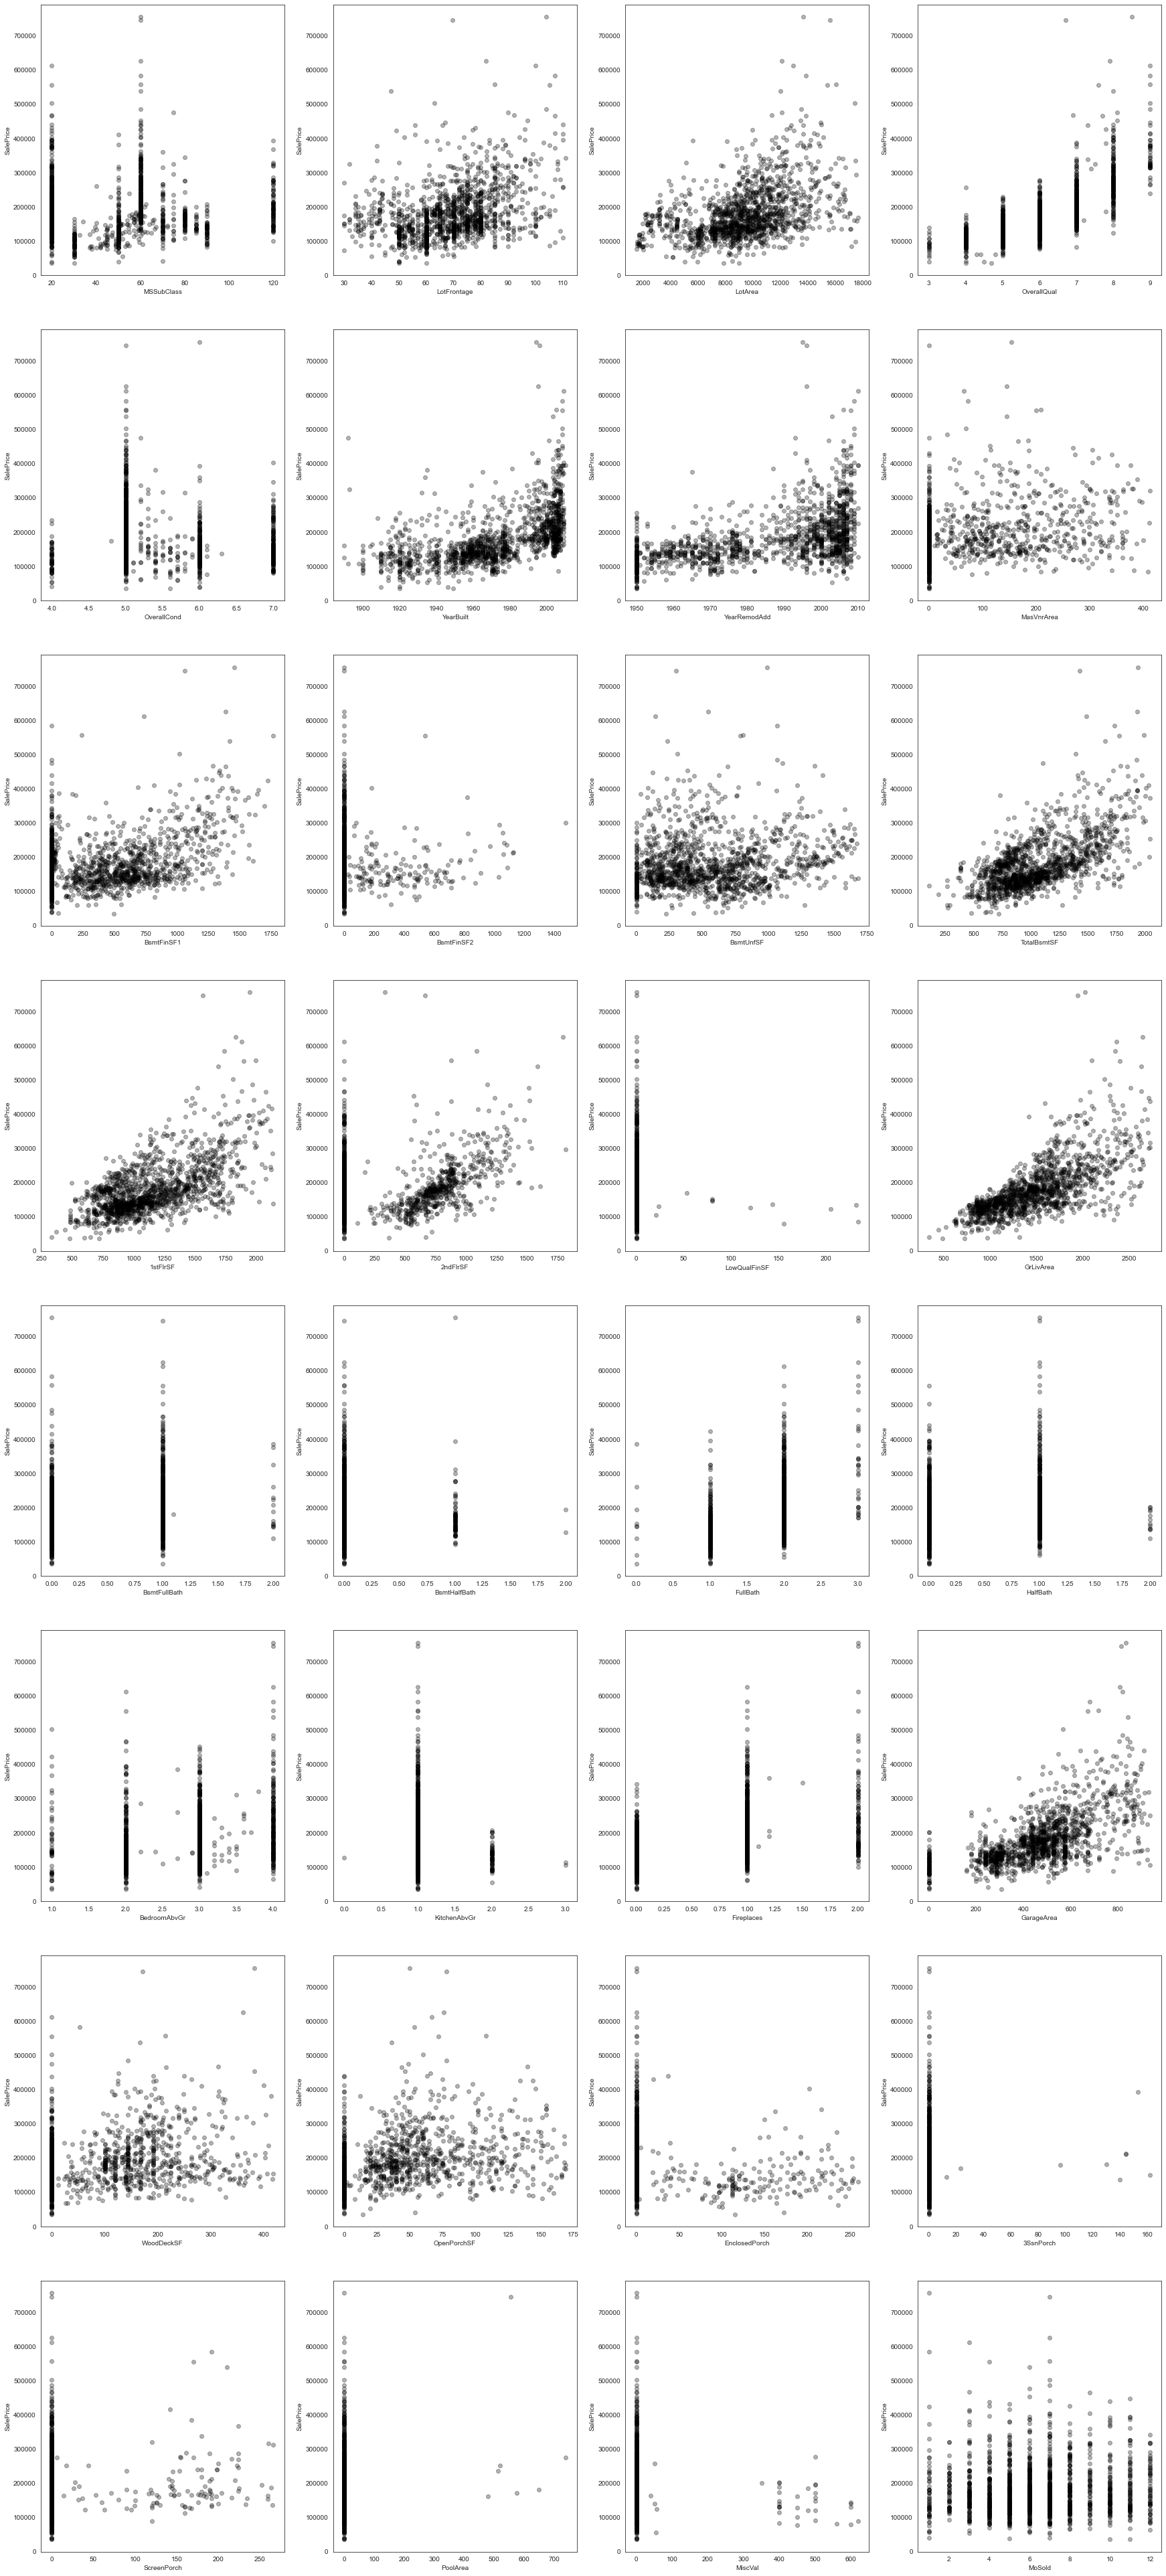

cell_content.py:8:80: E501 line too long (89 > 79 characters)



In [246]:
# Param
path = 'Figures/P8_ScatterPlots.jpg'

# Get the desired col names
cols_scatter_x = list(df_train_04.columns)
cols_scatter_y = ['SalePrice']
# Brutal plots : target vs every feature
Plot_Scatter_2_Features_ALL(df_train_05, path, cols_scatter_x, cols_scatter_y, PltLine=4)


pep8(_ih)

In [ ]:
# Param
path = 'Figures/P8_ScatterPlots.jpg'

# Get the desired col names
cols_scatter_x = list(df_train_04.columns)
cols_scatter_y = ['SalePrice']
# Brutal plots : target vs every feature
Plot_Scatter_2_Features_ALL(df_train_05, path, cols_scatter_x, cols_scatter_y, PltLine=4)


pep8(_ih)

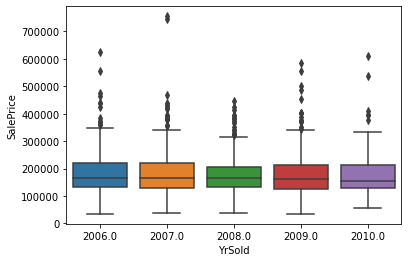

In [114]:
# Get the desired col names and explore
cols_x = 'YrSold'
cols_y = 'SalePrice'
# Plot boxplot for more adapted cases
Data = df_train_05.copy()
sns.boxplot(x=cols_x, y=cols_y, data=Data)

# Does not bring much, can be erased
df_train_05 = df_train_05.drop(['YrSold'], axis=1)
df_train_04 = df_train_04.drop(['YrSold'], axis=1)
df_test_03 = df_test_03.drop(['YrSold'], axis=1)

pep8(_ih)

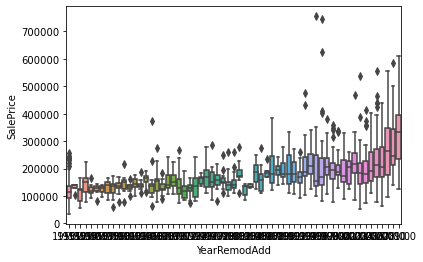

In [116]:
# Get the desired col names and explore
cols_x = 'YearRemodAdd'
cols_y = 'SalePrice'

# Plot boxplot for more adapted cases
Data = df_train_05.copy()
sns.boxplot(x=cols_x, y=cols_y, data=Data)


pep8(_ih)

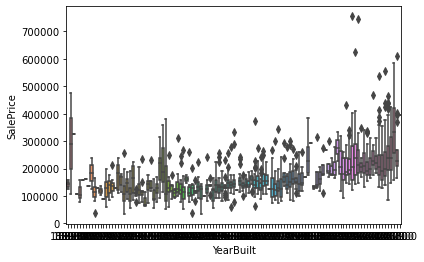

In [118]:
# Get the desired col names and explore
cols_x = 'YearBuilt'
cols_y = 'SalePrice'

# Plot boxplot for more adapted cases
Data = df_train_05.copy()
sns.boxplot(x=cols_x, y=cols_y, data=Data)


pep8(_ih)

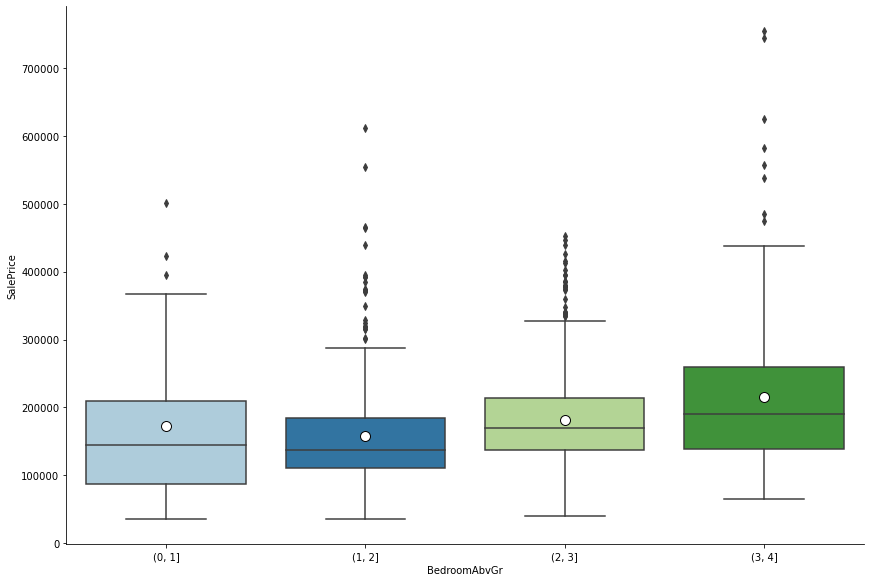

In [119]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4)])

cols_x = 'BedroomAbvGr'
cols_y = 'SalePrice'

palette = sns.color_palette("Paired")

sns.catplot(data=Data,
            kind="box",
            x=pd.cut(Data[cols_x], bins=bins),
            y=cols_y,
            ci="sd",
            # color="#006d77",
            palette=palette,
            # alpha=.5,
            height=8,
            aspect=1.5,
            showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})


pep8(_ih)

In [120]:
df_train_05.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,48.609932,68.952329,9343.021712,6.079658,5.456096,1971.79774,1984.865753,69.727397,434.583562,46.549315,551.359932,1063.860411,1151.211781,344.980342,0.977877,1494.005548,0.424041,0.057534,1.565068,0.382877,2.836781,1.046575,0.606986,465.889247,85.021849,36.015753,18.851644,0.688356,11.783082,2.758904,10.506849,6.321918,180921.195890
std,28.274087,15.575101,3159.216299,1.301063,0.770282,29.36243,20.645407,104.359469,423.982930,161.319273,409.081240,352.233517,350.498806,432.441743,12.600477,461.746857,0.514816,0.238753,0.550916,0.502885,0.711867,0.220338,0.630430,200.346553,106.071639,43.128400,53.056410,9.684792,44.441524,40.177307,69.969037,2.703626,79442.502883
min,20.000000,30.000000,1491.000000,3.000000,4.000000,1890.00000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.00000,1967.000000,0.000000,0.000000,0.000000,223.000000,804.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,329.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,50.000000,70.000000,9400.000000,6.000000,5.000000,1973.00000,1994.000000,0.000000,381.000000,0.000000,475.000000,993.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,478.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,60.000000,79.125000,11302.650000,7.000000,6.000000,2000.00000,2004.000000,125.000000,706.500000,0.000000,804.500000,1298.250000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,576.000000,162.500000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,120.000000,111.000000,17671.000000,9.000000,7.000000,2010.00000,2010.000000,412.000000,1767.000000,1474.000000,1680.000000,2046.000000,2136.000000,1818.000000,234.000000,2730.000000,2.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,936.000000,418.000000,169.000000,259.000000,162.000000,266.000000,738.000000,620.000000,12.000000,755000.000000


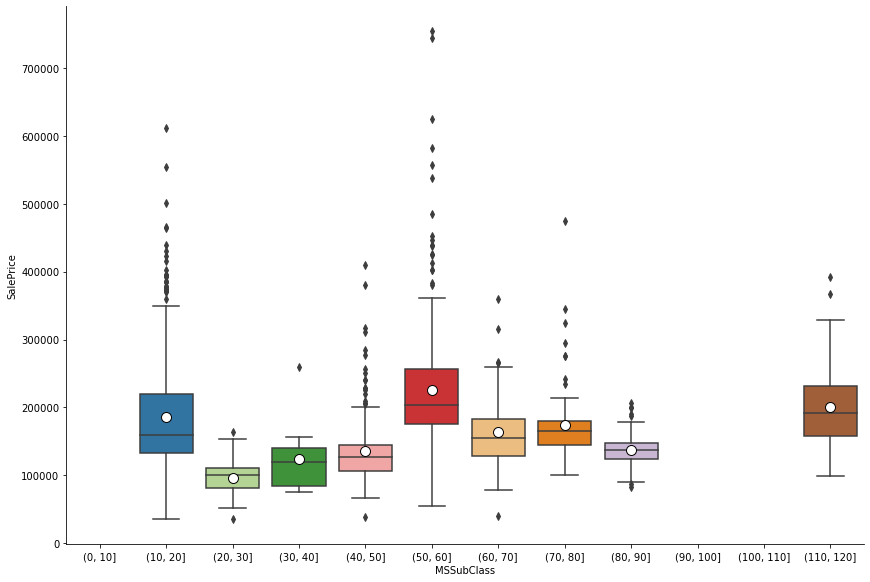

In [121]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20),
                                     (20, 30), (30, 40),
                                     (40, 50), (50, 60),
                                     (60, 70), (70, 80),
                                     (80, 90), (90, 100),
                                     (100, 110), (110, 120)])

cols_x = 'MSSubClass'
cols_y = 'SalePrice'

palette = sns.color_palette("Paired")

sns.catplot(data=Data,
            kind="box",
            x=pd.cut(Data[cols_x], bins=bins),
            y=cols_y,
            ci="sd",
            # color="#006d77",
            palette=palette,
            # alpha=.5,
            height=8,
            aspect=1.5,
            showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})


pep8(_ih)

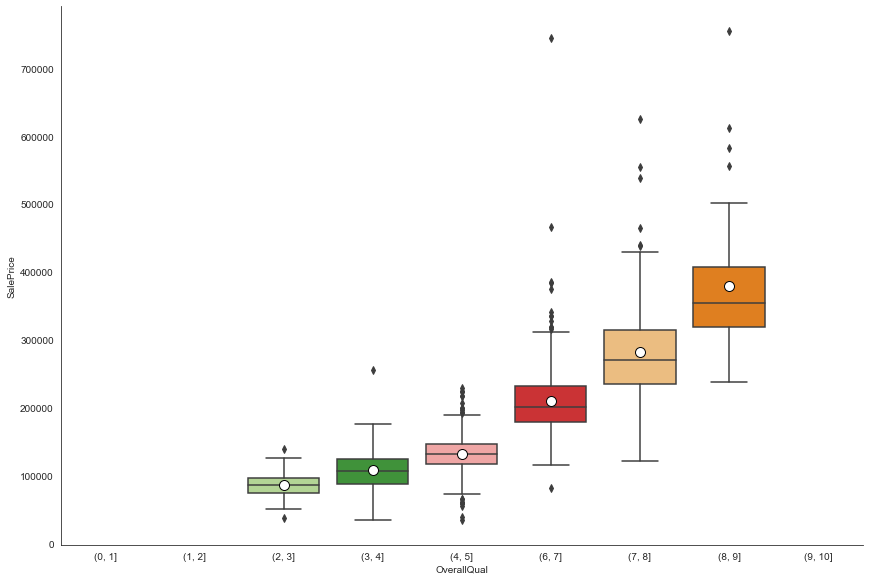

In [207]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3),
                                     (3, 4), (4, 5), (6, 7),
                                     (7, 8), (8, 9), (9, 10)])

cols_x = 'OverallQual'
cols_y = 'SalePrice'

palette = sns.color_palette("Paired")

sns.catplot(data=Data,
            kind="box",
            x=pd.cut(Data[cols_x], bins=bins),
            y=cols_y,
            ci="sd",
            # color="#006d77",
            palette=palette,
            # alpha=.5,
            height=8,
            aspect=1.5,
            showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})

plt.savefig('Figures/P8_Boxplot_OverallQual_Vs_y.jpg')


pep8(_ih)

# Supervised Learning

In [123]:
df_train_04.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0
1,20.0,80.0,9600.0,6.0,5.9,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,642.0,0.0,35.0,49.3,0.0,0.0,0.0,0.0,2.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0


In [124]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# We don't have target values for test set
# Train / test split is required
X = df_train_04
y = df_train_05['SalePrice']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.20,
                                                                    random_state=100)

print("Training: {} rows,\nTest: {} rows.\n".format(X_train.shape[0],
                                                    X_test.shape[0]))


pep8(_ih)

Training: 1168 rows,
Test: 292 rows.

cell_content.py:11:80: E501 line too long (83 > 79 characters)
cell_content.py:12:80: E501 line too long (85 > 79 characters)



In [125]:
from sklearn import preprocessing

# Robust Scaling
std_scale = preprocessing.RobustScaler().fit(X_train)
X_train_Scaled = std_scale.transform(X_train)
X_test_Scaled = std_scale.transform(X_test)

print('X_train_Scaled :', X_train_Scaled.shape,
      '\nX_test_Scaled :', X_test_Scaled.shape)

print('y_train :', y_train.shape,
      '\ny_test :', y_test.shape)

# Reshape y vectors
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print('y_train reshaped :', y_train.shape,
      '\ny_test reshaped :', y_test.shape)


pep8(_ih)

X_train_Scaled : (1168, 32) 
X_test_Scaled : (292, 32)
y_train : (1168,) 
y_test : (292,)
y_train reshaped : (1168, 1) 
y_test reshaped : (292, 1)



In [126]:
from sklearn.utils.validation import check_consistent_length, check_array


def mean_absolute_percentage_error(y_true, y_pred,
                                   sample_weight=None,
                                   multioutput='uniform_average'):
    """Mean absolute percentage error regression loss.
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    .. versionadded:: 0.24
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
        If input is list then the shape must be (n_outputs,).
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.
    Returns
    -------
    loss : float or ndarray of floats in the range [0, 1/eps]
        If multioutput is 'raw_values', then mean absolute percentage error
        is returned for each output separately.
        If multioutput is 'uniform_average' or an ndarray of weights, then the
        weighted average of all output errors is returned.
        MAPE output is non-negative floating point. The best value is 0.0.
        But note the fact that bad predictions can lead to arbitarily large
        MAPE values, especially if some y_true values are very close to zero.
        Note that we return a large value instead of `inf` when y_true is zero.
    Examples
    --------
    >>> from sklearn.metrics import mean_absolute_percentage_error
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.3273...
    >>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
    >>> y_pred = [[0, 2], [-1, 2], [8, -5]]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.5515...
    >>> mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])
    0.6198...
    """
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
        y_true, y_pred, multioutput)
    check_consistent_length(y_true, y_pred, sample_weight)
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape,
                               weights=sample_weight, axis=0)
    if isinstance(multioutput, str):
        if multioutput == 'raw_values':
            return output_errors
        elif multioutput == 'uniform_average':
            # pass None as weights to np.average: uniform mean
            multioutput = None

    return np.average(output_errors, weights=multioutput)


def _check_reg_targets(y_true, y_pred, multioutput, dtype="numeric"):
    """Check that y_true and y_pred belong to the same regression task.
    Parameters
    ----------
    y_true : array-like
    y_pred : array-like
    multioutput : array-like or string in ['raw_values', uniform_average',
        'variance_weighted'] or None
        None is accepted due to backward compatibility of r2_score().
    Returns
    -------
    type_true : one of {'continuous', continuous-multioutput'}
        The type of the true target data, as output by
        'utils.multiclass.type_of_target'.
    y_true : array-like of shape (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples, n_outputs)
        Estimated target values.
    multioutput : array-like of shape (n_outputs) or string in ['raw_values',
        uniform_average', 'variance_weighted'] or None
        Custom output weights if ``multioutput`` is array-like or
        just the corresponding argument if ``multioutput`` is a
        correct keyword.
    dtype : str or list, default="numeric"
        the dtype argument passed to check_array.
    """
    check_consistent_length(y_true, y_pred)
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)

    if y_true.ndim == 1:
        y_true = y_true.reshape((-1, 1))

    if y_pred.ndim == 1:
        y_pred = y_pred.reshape((-1, 1))

    if y_true.shape[1] != y_pred.shape[1]:
        raise ValueError("y_true and y_pred have different number of output "
                         "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))

    n_outputs = y_true.shape[1]
    allowed_multioutput_str = ('raw_values', 'uniform_average',
                               'variance_weighted')
    if isinstance(multioutput, str):
        if multioutput not in allowed_multioutput_str:
            raise ValueError("Allowed 'multioutput' string values are {}. "
                             "You provided multioutput={!r}".format(
                                 allowed_multioutput_str,
                                 multioutput))
    elif multioutput is not None:
        multioutput = check_array(multioutput, ensure_2d=False)
        if n_outputs == 1:
            raise ValueError("Custom weights are useful only in "
                             "multi-output cases.")
        elif n_outputs != len(multioutput):
            raise ValueError(("There must be equally many custom weights "
                              "(%d) as outputs (%d).") %
                             (len(multioutput), n_outputs))
    y_type = 'continuous' if n_outputs == 1 else 'continuous-multioutput'

    return y_type, y_true, y_pred, multioutput


pep8(_ih)

## Baseline : multiple linear regression

Many hypothesis should be checked to grant reliability

https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b

In [127]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lr = linear_model.LinearRegression()


pep8(_ih)

In [128]:
import timeit
# --------------------- FIT
start_time = timeit.default_timer()

# ---------------------------------------------------
lr.fit(X_train_Scaled, y_train)
# ---------------------------------------------------

Train_Time_LR = timeit.default_timer() - start_time
print('Time :', Train_Time_LR, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 0.025757199999986824 s



In [130]:
# --------------------- PREDICT
start_time = timeit.default_timer()

# ---------------------------------------------------
y_pred_LR = lr.predict(X_test_Scaled)
# ---------------------------------------------------

Pred_Time_LR = timeit.default_timer() - start_time
print('Time :', Pred_Time_LR, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 0.0004384999999729189 s



In [131]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [132]:
# from sklearn.metrics import mean_absolute_percentage_error
# Doesn't work, add direclty manually MAPE function below

In [133]:
from sklearn.metrics import mean_squared_log_error

In [134]:
# Les scores de précision du modèle
R_2_LR = r2_score(y_test, y_pred_LR)
print('r2 score is', R_2_LR)

MSE_LR = mean_squared_error(y_test, y_pred_LR)
print('mean_sqrd_error =', MSE_LR)

MAE_LR = mean_absolute_error(y_test, y_pred_LR)
print('mean_absolute_error =', MAE_LR)

RMSE_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
print('root_mean_squared error =', RMSE_LR)

MAPE_LR = mean_absolute_percentage_error(y_test, y_pred_LR)*100
print('mean_absolute_percentage_error =', MAPE_LR, '%')

MSLE_LR = mean_squared_log_error(y_test, y_pred_LR)*100
print('mean_squared_log_error =', MSLE_LR)


pep8(_ih)

r2 score is 0.8267448296790891
mean_sqrd_error = 1113873112.7719522
mean_absolute_error = 21715.16578996559
root_mean_squared error = 33374.73764349245
mean_absolute_percentage_error = 12.381499192545387 %
mean_squared_log_error = 3.207417946778104



## XGBOOST 
kfold Cross Validation + GridSearch for hyper-parameters

In [135]:
# !pip install xgboost

In [136]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [137]:
kfold = KFold(n_splits=5, shuffle=True, random_state=100)


pep8(_ih)

In [138]:
param_XGB = {'n_estimators': [200, 500, 1000, 2000],
             'colsample_bytree': [0.6, 0.8],
             'max_depth': [5, 10, 15],
             'reg_alpha': [1.1, 1.3, 1.5],
             'reg_lambda': [1.1, 1.3, 1.5],
             'subsample': [0.5, 0.7, 0.9],
             'learning_rate': [0.01, 0.001]}

scoring_XGB = 'neg_mean_absolute_error'  # 'r2'

Model_XGB = XGBRegressor()

GS_XGB = GridSearchCV(estimator=Model_XGB,
                      param_grid=param_XGB,
                      cv=kfold,
                      n_jobs=-1,
                      scoring=scoring_XGB)


pep8(_ih)

In [139]:
# --------------------- FIT

start_time = timeit.default_timer()

# ---------------------------------------------------
fit_Model_XGB = GS_XGB.fit(X_train_Scaled, y_train)
# ---------------------------------------------------

Train_Time_XGB = timeit.default_timer() - start_time
print('Time :', Train_Time_XGB, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 8077.863823600001 s



In [140]:
# --------------------- PREDICT
start_time = timeit.default_timer()

# -------------------------------------------------
y_pred_XGB = fit_Model_XGB.predict(X_test_Scaled)
# -------------------------------------------------

Pred_Time_XGB = timeit.default_timer() - start_time
print('Time :', Pred_Time_XGB, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 0.009005699999761418 s



In [141]:
print(fit_Model_XGB.best_params_)

{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.5}


In [142]:
print(GS_XGB.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=1.1, reg_lambda=1.1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [143]:
R_2_XGB = r2_score(y_test, y_pred_XGB)
print('r2 score is', R_2_XGB)

MSE_XGB = mean_squared_error(y_test, y_pred_XGB)
print('mean_sqrd_error =', MSE_XGB)

MAE_XGB = mean_absolute_error(y_test, y_pred_XGB)
print('mean_absolute_error =', MAE_XGB)

RMSE_XGB = np.sqrt(mean_squared_error(y_test, y_pred_XGB))
print('root_mean_squared error =', RMSE_XGB)

MAPE_XGB = mean_absolute_percentage_error(y_test, y_pred_XGB)*100
print('mean_absolute_percentage_error =', MAPE_XGB, '%')

MSLE_XGB = mean_squared_log_error(y_test, y_pred_XGB)*100
print('mean_squared_log_error =', MSLE_XGB)


pep8(_ih)

r2 score is 0.8738126530509762
mean_sqrd_error = 811269832.110627
mean_absolute_error = 16856.59223833476
root_mean_squared error = 28482.798881265637
mean_absolute_percentage_error = 9.859308597781185 %
mean_squared_log_error = 2.098987114546412



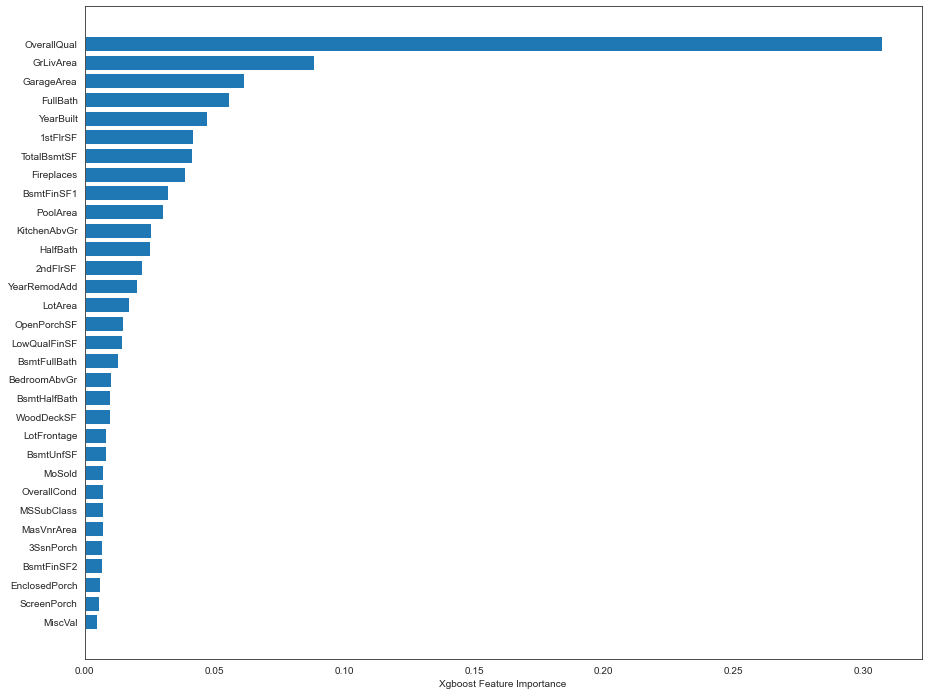

In [201]:
data_X_Features = df_train_04
sorted_idx = GS_XGB.best_estimator_.feature_importances_.argsort()
plt.figure(figsize=(15, 12))
plt.barh(data_X_Features.columns[sorted_idx],
         GS_XGB.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

plt.savefig('Figures/P8_Xgboost_Feature_Importance.jpg')


pep8(_ih)

## KNN 
kfold Cross Validation + GridSearch for hyper-parameters

In [145]:
from sklearn import neighbors

scoring_KNN = 'neg_mean_absolute_error'  # 'r2'

# Create the parameter grid based on the results of random search

param_KNN = {"n_neighbors": range(1, 30),
             "weights": ["uniform", "distance"],
             'p': [1, 2],
             'leaf_size': range(1, 50)}

Model_KNN = neighbors.KNeighborsRegressor()

GS_KNN = GridSearchCV(estimator=Model_KNN,
                      param_grid=param_KNN,
                      cv=kfold,
                      n_jobs=-1,
                      scoring=scoring_KNN)


pep8(_ih)

In [146]:
# --------------------- FIT
start_time = timeit.default_timer()

# -------------------------------------------------
fit_Model_KNN = GS_KNN.fit(X_train_Scaled, y_train)
# -------------------------------------------------

Train_Time_KNN = timeit.default_timer() - start_time
print('Time :', Train_Time_KNN, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 69.21514369999932 s



In [147]:
# --------------------- PREDICT

start_time = timeit.default_timer()

# --------------------------------------------
y_pred_KNN = fit_Model_KNN.predict(X_test_Scaled)
# --------------------------------------------

Pred_Time_KNN = timeit.default_timer() - start_time
print('Time :', Pred_Time_KNN, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 0.015368800000942429 s



In [148]:
print(GS_KNN.best_estimator_)

KNeighborsRegressor(leaf_size=1, n_neighbors=8, p=1, weights='distance')


In [149]:
print(GS_KNN.best_params_)

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [150]:
R_2_KNN = r2_score(y_test, y_pred_KNN)
print('r2 score is', R_2_KNN)

MSE_KNN = mean_squared_error(y_test, y_pred_KNN)
print('mean_sqrd_error =', MSE_KNN)

MAE_KNN = mean_absolute_error(y_test, y_pred_KNN)
print('mean_absolute_error =', MAE_KNN)

RMSE_KNN = np.sqrt(mean_squared_error(y_test, y_pred_KNN))
print('root_mean_squared error =', RMSE_KNN)

MAPE_KNN = mean_absolute_percentage_error(y_test, y_pred_KNN)*100
print('mean_absolute_percentage_error =', MAPE_KNN, '%')

MSLE_KNN = mean_squared_log_error(y_test, y_pred_KNN)*100
print('mean_squared_log_error =', MSLE_KNN)


pep8(_ih)

r2 score is 0.6879901646879639
mean_sqrd_error = 2005939365.7964377
mean_absolute_error = 26275.090400402107
root_mean_squared error = 44787.714451581895
mean_absolute_percentage_error = 15.90515511621965 %
mean_squared_log_error = 5.0064277299764965



## Random Forest 
kfold Cross Validation + GridSearch for hyper-parameters

In [151]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [152]:
from sklearn.ensemble import RandomForestRegressor

scoring_RF = 'neg_mean_absolute_error'  # 'r2'

# Create the parameter grid based on the results of random search

param_RF = {'bootstrap': [True],
            'max_depth': [5, 10, 30, 40],
            'max_features': [2, 5, 10],
            'min_samples_leaf': [1, 3, 5, 10],
            'min_samples_split': [2, 6, 10],
            'n_estimators': [200, 500, 1000, 2000]}

rf = RandomForestRegressor()

GS_RF = GridSearchCV(estimator=rf,
                     param_grid=param_RF,
                     cv=kfold,
                     n_jobs=-1,
                     scoring=scoring_RF)

# GS_RF = RandomForestRegressor()


pep8(_ih)

In [153]:
# --------------------- FIT
start_time = timeit.default_timer()

# -------------------------------------------------
fit_Model_RF = GS_RF.fit(X_train, y_train)
# -------------------------------------------------

Train_Time_RF = timeit.default_timer() - start_time
print('Time :', Train_Time_RF, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 1456.3371115999998 s



In [154]:
# --------------------- PREDICT

start_time = timeit.default_timer()

# --------------------------------------------
y_pred_RF = fit_Model_RF.predict(X_test)
# --------------------------------------------

Pred_Time_RF = timeit.default_timer() - start_time
print('Time :', Pred_Time_RF, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 0.032952199999272125 s



In [155]:
print(GS_RF.best_estimator_)

RandomForestRegressor(max_depth=30, max_features=10, n_estimators=200)


In [156]:
print(GS_RF.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [157]:
R_2_RF = r2_score(y_test, y_pred_RF)
print('r2 score is', R_2_RF)

MSE_RF = mean_squared_error(y_test, y_pred_RF)
print('mean_sqrd_error =', MSE_RF)

MAE_RF = mean_absolute_error(y_test, y_pred_RF)
print('mean_absolute_error =', MAE_RF)

RMSE_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))
print('root_mean_squared error =', RMSE_RF)

MAPE_RF = mean_absolute_percentage_error(y_test, y_pred_RF)*100
print('mean_absolute_percentage_error =', MAPE_RF, '%')

MSLE_RF = mean_squared_log_error(y_test, y_pred_RF)*100
print('mean_squared_log_error =', MSLE_RF)


pep8(_ih)

r2 score is 0.866272879272538
mean_sqrd_error = 859743717.6092787
mean_absolute_error = 17776.02
root_mean_squared error = 29321.386693150765
mean_absolute_percentage_error = 10.732379273054521 %
mean_squared_log_error = 2.5007936255961565



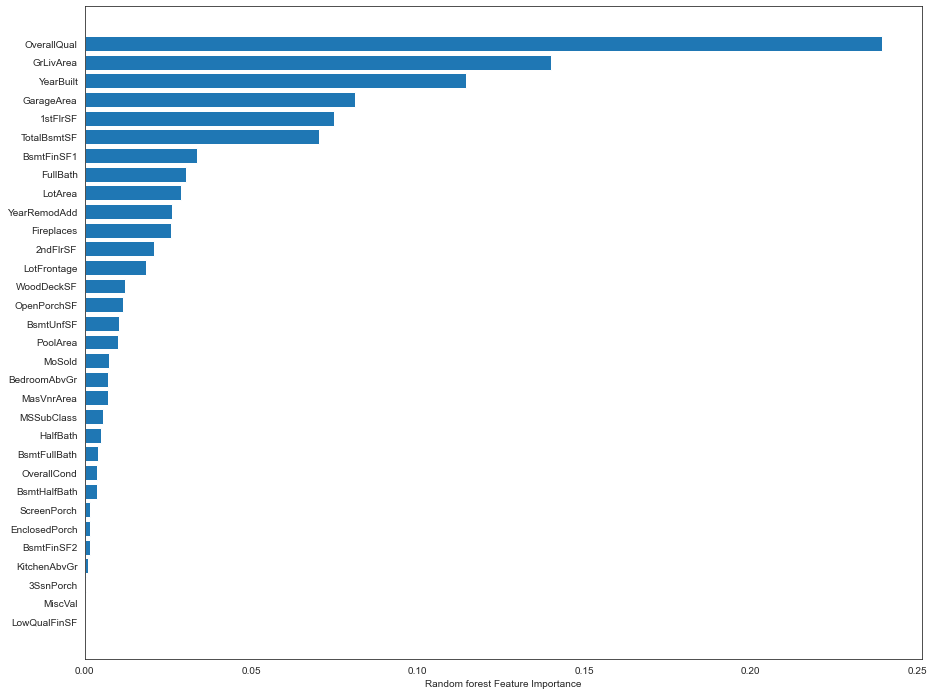

In [196]:
sorted_idx = GS_RF.best_estimator_.feature_importances_.argsort()
plt.figure(figsize=(15, 12))
plt.barh(data_X_Features.columns[sorted_idx],
         GS_RF.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random forest Feature Importance")

plt.savefig('Figures/P8_FeatureImp_RF.jpg')

pep8(_ih)

# Performance tables

In [159]:
Results = {'Modèle': ['Linear_Regression', 'XGBOOST', 'Random_Forest', 'KNN'],
           'Fit_Time':  [Train_Time_LR, Train_Time_XGB, Train_Time_RF, Train_Time_KNN],
           'R²_test': [R_2_LR, R_2_XGB, R_2_RF, R_2_KNN],
           'MSE': [MSE_LR, MSE_XGB, MSE_RF, MSE_KNN],
           'MAE': [MAE_LR, MAE_XGB, MAE_RF,  MAE_KNN],
           'RMSE': [RMSE_LR, RMSE_XGB, RMSE_RF, RMSE_KNN],
           'MAPE': [MAPE_LR, MAPE_XGB, MAPE_RF, MAPE_KNN],
           'MSLE': [MSLE_LR, MSLE_XGB, MSLE_RF, MSLE_KNN]}


df_Results = pd.DataFrame(Results,
                          columns=['Modèle', 'Fit_Time', 'R²_test',
                                   'MSE', 'MAE', 'RMSE', 'MAPE', 'MSLE'])


pep8(_ih)

cell_content.py:2:80: E501 line too long (87 > 79 characters)



In [160]:
df_Results

,Modèle,Fit_Time,R²_test,MSE,MAE,RMSE,MAPE,MSLE
0,Linear_Regression,0.025757,0.826745,1.113873e+09,21715.165790,33374.737643,12.381499,3.207418
1,XGBOOST,8077.863824,0.873813,8.112698e+08,16856.592238,28482.798881,9.859309,2.098987
2,Random_Forest,1456.337112,0.866273,8.597437e+08,17776.020000,29321.386693,10.732379,2.500794
3,KNN,69.215144,0.687990,2.005939e+09,26275.090400,44787.714452,15.905155,5.006428


# Save predictions

In [161]:
df_Pred_Test = pd.DataFrame({'Test': y_test.ravel(),
                             'Prediction_LR': y_pred_LR.ravel(),
                             'Prediction_XGB': y_pred_XGB.ravel(),
                             'Prediction_RF': y_pred_RF.ravel(),
                             'Prediction_KNN': y_pred_KNN.ravel()})

pep8(_ih)

# Graphical results : predicted vs true values

In [162]:
# Ajout des colonnes pour les erreurs
df_Pred_Test['Error_LR'] = abs(df_Pred_Test['Test']-df_Pred_Test['Prediction_LR'])/df_Pred_Test['Test']*100
df_Pred_Test['Error_XGB'] = abs(df_Pred_Test['Test']-df_Pred_Test['Prediction_XGB'])/df_Pred_Test['Test']*100
df_Pred_Test['Error_RF'] = abs(df_Pred_Test['Test']-df_Pred_Test['Prediction_RF'])/df_Pred_Test['Test']*100
df_Pred_Test['Error_KNN'] = abs(df_Pred_Test['Test']-df_Pred_Test['Prediction_KNN'])/df_Pred_Test['Test']*100

pep8(_ih)

cell_content.py:2:80: E501 line too long (107 > 79 characters)
cell_content.py:3:80: E501 line too long (109 > 79 characters)
cell_content.py:4:80: E501 line too long (107 > 79 characters)
cell_content.py:5:80: E501 line too long (109 > 79 characters)



In [163]:
df_Pred_Test

,Test,Prediction_LR,Prediction_XGB,Prediction_RF,Prediction_KNN,Error_LR,Error_XGB,Error_RF,Error_KNN
0,120500,96430.985299,120759.804688,121193.415,119880.672816,19.974286,0.215606,0.575448,0.513964
1,196500,208807.454413,192405.437500,201864.475,207919.036985,6.263336,2.083747,2.730013,5.811215
2,176000,184740.842289,180274.140625,178717.490,181604.413299,4.966388,2.428489,1.544028,3.184326
3,213500,216262.940109,210800.390625,217657.025,208441.088834,1.294117,1.264454,1.947084,2.369513
4,171000,231966.349498,213228.531250,145894.000,481421.132741,35.652836,24.695048,14.681871,181.532826
...,...,...,...,...,...,...,...,...,...
287,256000,255746.302630,216083.656250,197341.120,158814.756302,0.099101,15.592322,22.913625,37.962986
288,230000,254414.349480,235437.812500,245829.915,252353.580881,10.614935,2.364266,6.882572,9.718948
289,199900,209369.948686,199508.953125,195828.970,165085.569922,4.737343,0.195621,2.036533,17.415923
290,402000,332024.066675,355986.968750,346511.005,187309.860318,17.406949,11.446028,13.803233,53.405507


In [164]:
def color_to_use(num):
    if np.isinf(num):
        return "#f7a6e3"
    elif num >= 75:
        return "#f7a6e3"
    elif num < 75 and num >= 50:
        return "#f7a6ba"
    elif num < 50 and num >= 25:
        return "#f7baa6"
    elif num < 25 and num >= 10:
        return "#f7e3a6"
    elif num < 10 and num >= 5:
        return "#e3f7a6"
    elif num < 5:
        return "#baf7a6"
    else:
        return "#baf7a6"


pep8(_ih)

In [165]:
df_Pred_Test['color_LR'] = df_Pred_Test['Error_LR'].apply(color_to_use)
df_Pred_Test['color_XGB'] = df_Pred_Test['Error_XGB'].apply(color_to_use)
df_Pred_Test['color_RF'] = df_Pred_Test['Error_RF'].apply(color_to_use)
df_Pred_Test['color_KNN'] = df_Pred_Test['Error_KNN'].apply(color_to_use)

df_Pred_Test.head()


pep8(_ih)

In [237]:
def plot_pred_vs_test(df_Pred_Test, error_col, color_col, pred_model):

    df_Pred_Test = df_Pred_Test.sort_values(by=error_col)

    dict_lab = {'#f7a6e3': '+75%',
                '#f7a6ba': "between 50% & 75%",
                '#f7baa6': "between 25% & 50%",
                '#f7e3a6': "between 10% & 25%",
                '#e3f7a6': "between 10% & 5%",
                '#baf7a6': "-5%"}

    fig = plt.figure(figsize=[10, 10])
    # fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    title = pred_model + " : Pred vs Test, error highlighted (%)."
    plt.title(title, size=16)

    for c in df_Pred_Test[color_col].unique():

        d = df_Pred_Test.loc[df_Pred_Test[color_col] == c]

        sns.scatterplot(data=d,
                        x="Test",
                        y=pred_model,
                        color=c,
                        label=dict_lab[c])

    plt.xlabel('Test ', size=13)
    plt.ylabel('Prediction ', size=13)
    plt.grid(color='#dddddd')


pep8(_ih)

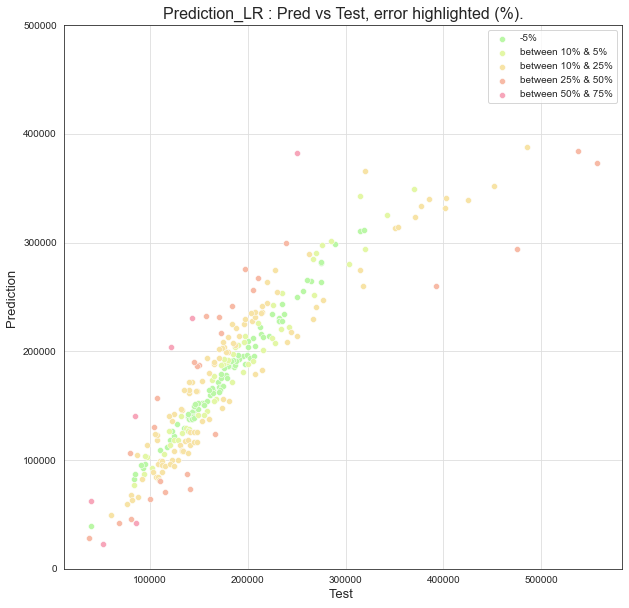

In [238]:
# Parameters
error_col = "Error_LR"
color_col = "color_LR"
pred_model = "Prediction_LR"

plot_pred_vs_test(df_Pred_Test, error_col, color_col, pred_model)
plt.ylim((0, 500000))

plt.savefig('Figures/P8_PredVsTrue_LR.jpg')

pep8(_ih)

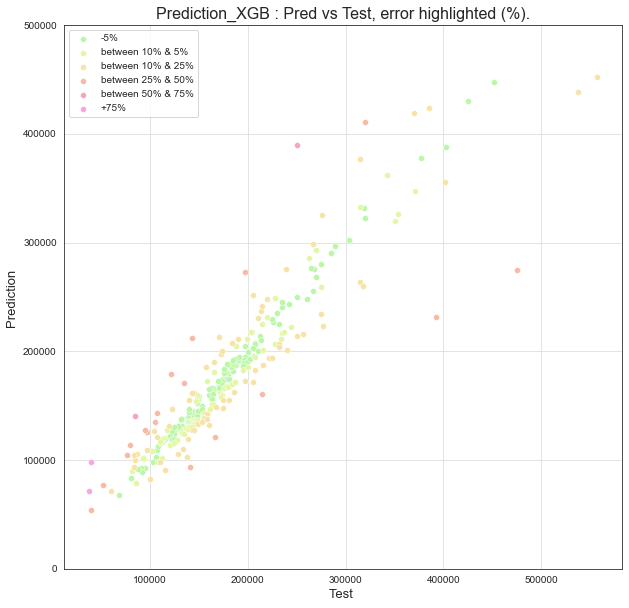

In [239]:
# Parameters
error_col = "Error_XGB"
color_col = "color_XGB"
pred_model = "Prediction_XGB"

plot_pred_vs_test(df_Pred_Test, error_col, color_col, pred_model)
plt.ylim((0, 500000))

plt.savefig('Figures/P8_PredVsTrue_XGB.jpg')

pep8(_ih)

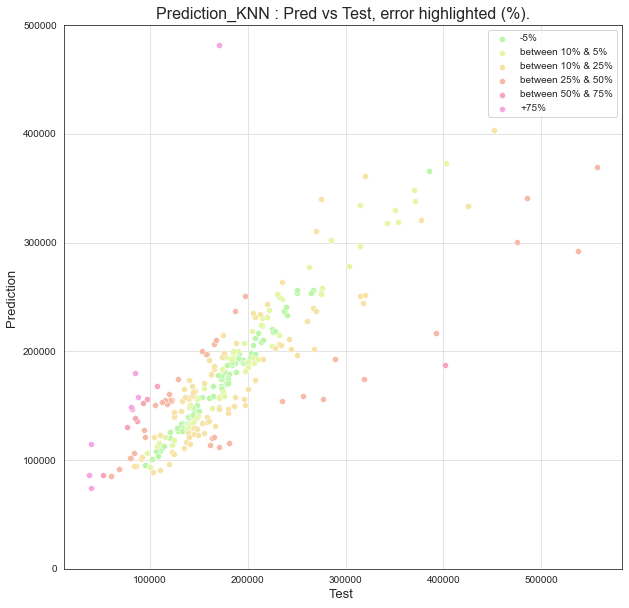

In [240]:
# Parameters
error_col = "Error_KNN"
color_col = "color_KNN"
pred_model = "Prediction_KNN"

plot_pred_vs_test(df_Pred_Test, error_col, color_col, pred_model)
plt.ylim((0, 500000))

plt.savefig('Figures/P8_PredVsTrue_KNN.jpg')

pep8(_ih)

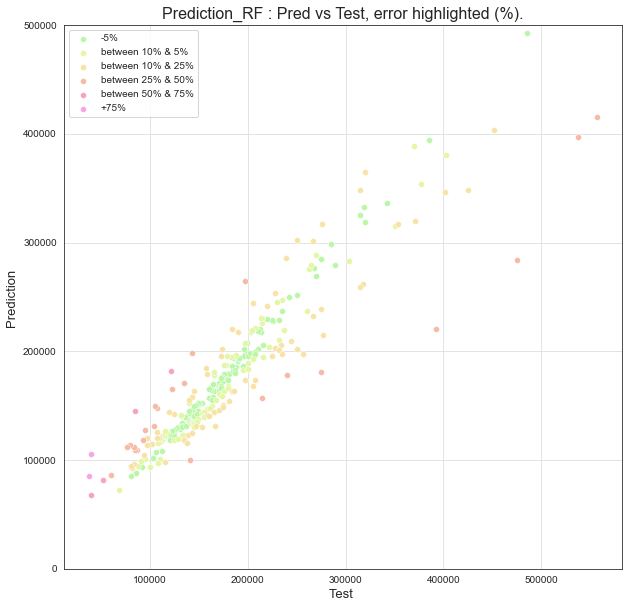

In [241]:
# Parameters
error_col = "Error_RF"
color_col = "color_RF"
pred_model = "Prediction_RF"

plot_pred_vs_test(df_Pred_Test, error_col, color_col, pred_model)
plt.ylim((0, 500000))

plt.savefig('Figures/P8_PredVsTrue_RF.jpg')

pep8(_ih)

In [242]:
def low_error_count(df, error, thresh):

    val = df[error][df[error] <= thresh].count()/df.shape[0]*100

    print(error + " cases with error below than", val, "(%).")

    return val


def high_error_count(df, error, thresh):

    val = df[error][df[error] >= thresh].count()/df.shape[0]*100

    print(error + " cases with error upper than", val, "(%).")

    return val


pep8(_ih)

In [172]:
# Global parameter
df = df_Pred_Test
thresh = 5

print('\n--------------- Low error ---------------------\n')

# Params
error = "Error_XGB"
xgb_low = low_error_count(df, error, thresh)

# Params
error = "Error_KNN"
lr_low = low_error_count(df, error, thresh)

# Params
error = "Error_LR"
knn_low = low_error_count(df, error, thresh)

# Params
error = "Error_RF"
rf_low = low_error_count(df, error, thresh)

print('\n--------------- High error ---------------------\n')

thresh = 25

# Params
error = "Error_XGB"
xgb_low = high_error_count(df, error, thresh)

# Params
error = "Error_KNN"
lr_low = high_error_count(df, error, thresh)

# Params
error = "Error_LR"
knn_low = high_error_count(df, error, thresh)

# Params
error = "Error_RF"
rf_low = high_error_count(df, error, thresh)


pep8(_ih)


--------------- Low error ---------------------

Error_XGB cases with error below than 43.49315068493151 (%).
Error_KNN cases with error below than 30.136986301369863 (%).
Error_LR cases with error below than 32.534246575342465 (%).
Error_RF cases with error below than 40.75342465753425 (%).

--------------- High error ---------------------

Error_XGB cases with error upper than 7.534246575342466 (%).
Error_KNN cases with error upper than 18.493150684931507 (%).
Error_LR cases with error upper than 11.643835616438356 (%).
Error_RF cases with error upper than 9.931506849315069 (%).



# Best model on whole train set
- Select best hyperparameters

In [173]:
# Whole Train data
X_train = df_train_04
y_train = df_train_05['SalePrice']

print(X_train.shape)


pep8(_ih)

(1460, 32)



In [174]:
# Robust Scaling
std_scale = preprocessing.RobustScaler().fit(X_train)
X_train_Scaled = std_scale.transform(X_train)

print('X_train_Scaled :', X_train_Scaled.shape)

print('y_train :', y_train.shape)

# Reshape y vectors
y_train = y_train.values.reshape(-1, 1)

print('y_train reshaped :', y_train.shape)


pep8(_ih)

X_train_Scaled : (1460, 32)
y_train : (1460,)
y_train reshaped : (1460, 1)



In [175]:
kfold = KFold(n_splits=5, shuffle=True, random_state=100)


pep8(_ih)

In [176]:
param_XGB_Best = {'n_estimators': [1000],
                  'colsample_bytree': [0.6],
                  'max_depth': [5],
                  'reg_alpha': [1.1],
                  'reg_lambda': [1.5],
                  'subsample': [0.5],
                  'learning_rate': [0.01]}

scoring_XGB_Best = 'neg_mean_absolute_error'  # 'r2'

Model_XGB_Best = XGBRegressor()

GS_XGB_Best = GridSearchCV(estimator=Model_XGB_Best,
                           param_grid=param_XGB_Best,
                           cv=kfold,
                           n_jobs=-1,
                           scoring=scoring_XGB_Best)


pep8(_ih)

In [181]:
# --------------------- FIT
start_time = timeit.default_timer()

# ---------------------------------------------------
fit_Model_XGB_Best = GS_XGB_Best.fit(X_train_Scaled, np.log(y_train))
# ---------------------------------------------------

Train_Time_XGB_Best = timeit.default_timer() - start_time
print('Time :', Train_Time_XGB_Best, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 8.35067059999892 s



# Predict on whole given Test set

In [182]:
# Robust Scaling
test = df_test_03.copy()
std_scale = preprocessing.RobustScaler().fit(test)
test_Scaled = std_scale.transform(test)


# --------------------- PREDICT
start_time = timeit.default_timer()

# -------------------------------------------------
y_pred_XGB_Best = np.exp(fit_Model_XGB_Best.predict(test_Scaled))
# -------------------------------------------------

Pred_Time_XGB_Best = timeit.default_timer() - start_time
print('Time :', Pred_Time_XGB_Best, 's')
# --------------------------------------------------------------------


pep8(_ih)

Time : 0.011782300000049872 s



In [183]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

# Submission

In [184]:
test_id = df_test['Id']

submission = pd.DataFrame({'Id': test_id,
                           'SalePrice': y_pred_XGB_Best})

# Save results
submission.to_csv("submission.csv", index=False)


pep8(_ih)